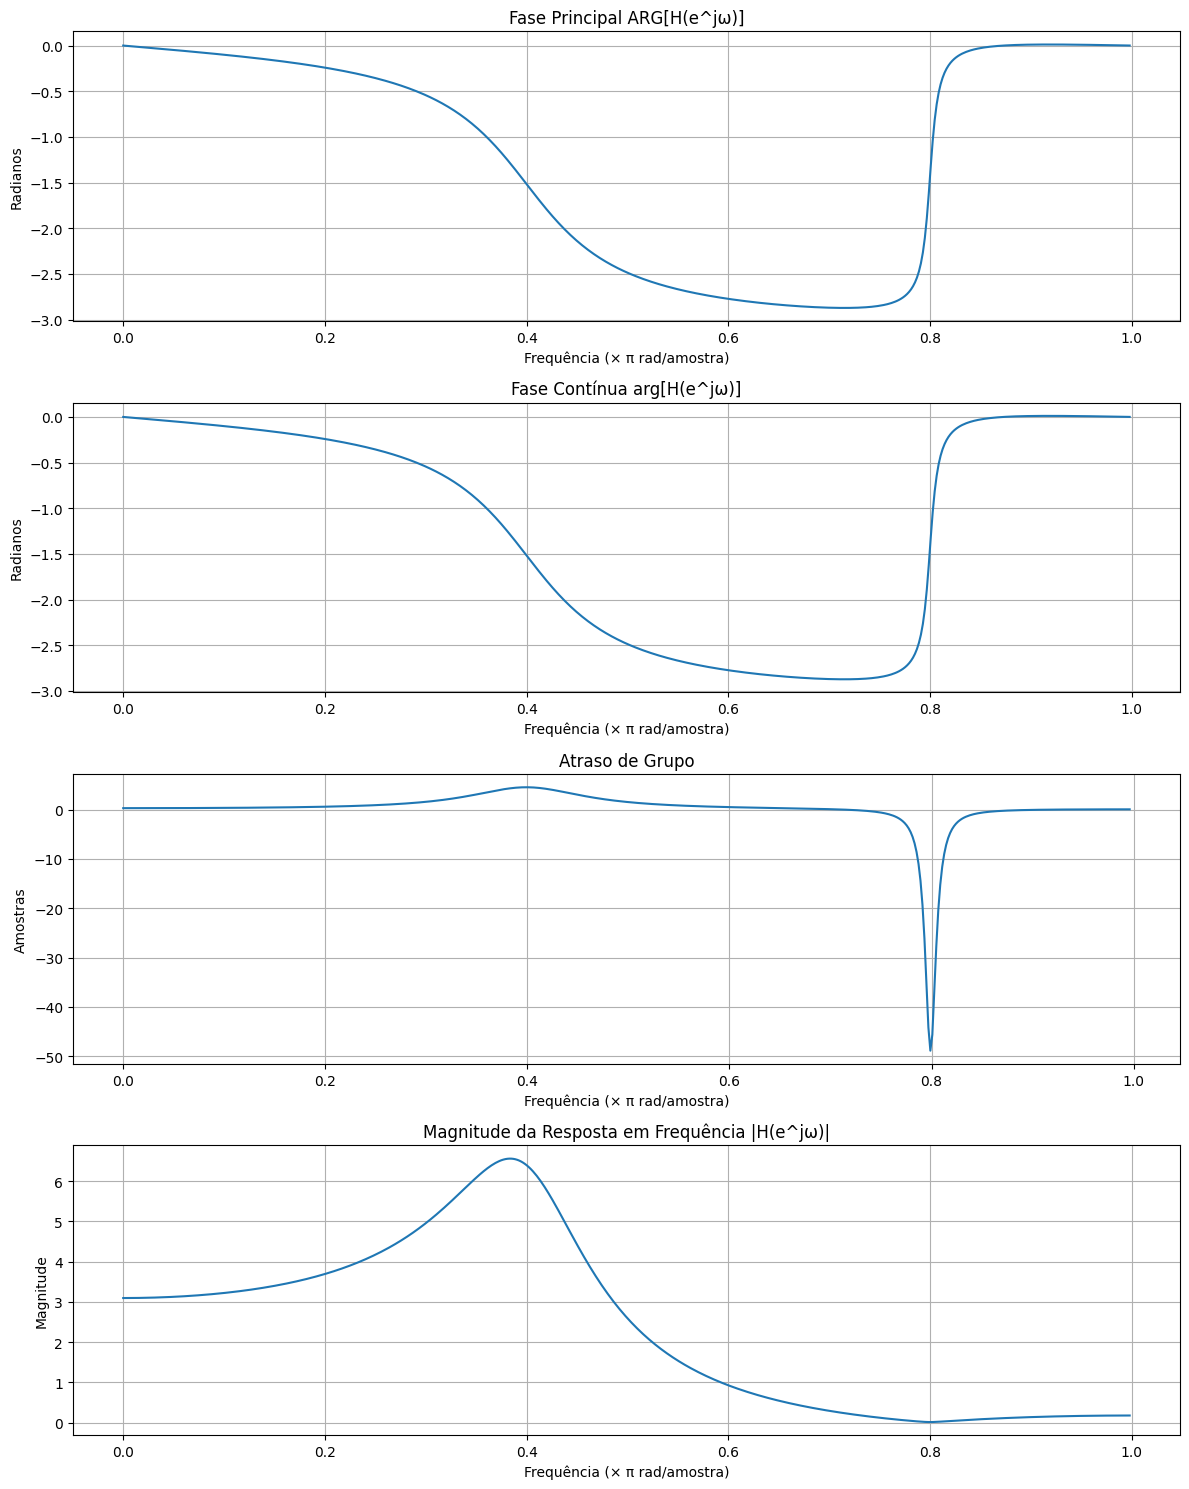

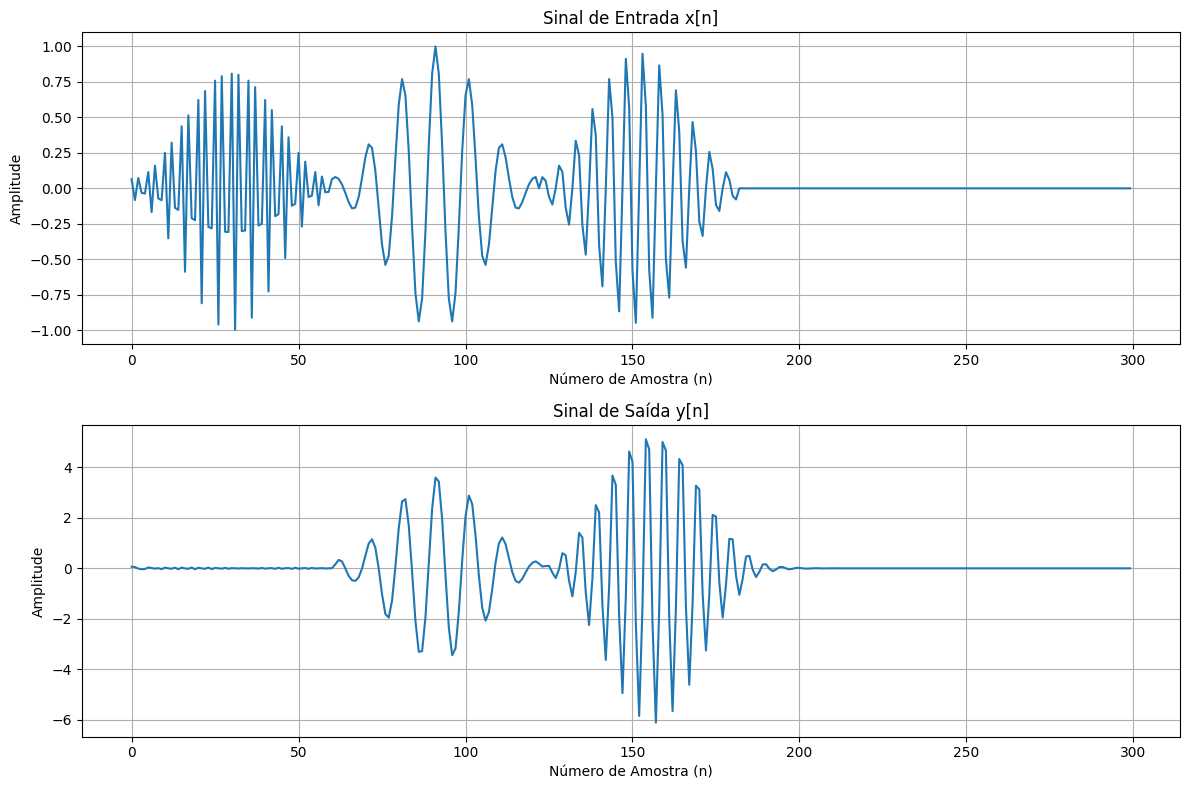


Análise dos sinais:
Amplitude máxima do sinal de entrada: 1.00
Amplitude máxima do sinal de saída: 6.11

Localização dos picos dos pulsos:
Pico do primeiro pulso (entrada): 31
Pico do primeiro pulso (saída): 0


In [1]:
# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

# Definindo parâmetros
M = 60  # Comprimento da janela
N = 300  # Comprimento do sinal de entrada
n = np.arange(N)  # Números de amostra

# Definindo a função de janela (Hamming) conforme equação 5.17
w = 0.54 - 0.46 * np.cos(2 * np.pi * n / M)
w[n > M] = 0  # Aplicando a janela

# Definindo os sinais de entrada conforme equações 5.16a, 5.16b e 5.16c
x1 = w * np.cos(0.2 * np.pi * n)  # Frequência ω1 = 0.2π
x2 = w * np.cos(0.4 * np.pi * n - np.pi / 2)  # Frequência ω2 = 0.4π
x3 = w * np.cos(0.8 * np.pi * n + np.pi / 5)  # Frequência ω3 = 0.8π

# Combinando os sinais de entrada conforme equação 5.18
x = x3 + np.roll(x1, M + 1) + np.roll(x2, 2 * (M + 1))

# Definindo H(z) conforme equação 5.15
# H(z) = H1(z) * H2(z)

# H1(z): par conjugado de polos em 0.8e±j0.4π e zeros em 0.98e±j0.8π
poles = np.array([0.8 * np.exp(1j * 0.4 * np.pi), 
                 0.8 * np.exp(-1j * 0.4 * np.pi)])
zeros = np.array([0.98 * np.exp(1j * 0.8 * np.pi), 
                 0.98 * np.exp(-1j * 0.8 * np.pi)])

# H2(z): filtro all-pass com polos duplos em ck e zeros duplos em 1/ck
ck = 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * np.arange(1, 5)))

# Criando a função de transferência H(z)
b = np.poly(zeros)  # Numerador (zeros)
a = np.poly(poles)  # Denominador (polos)

# Computando a resposta em frequência
w_freq, h = freqz(b, a, worN=512)

# Análise de fase
phase = np.angle(h)
unwrapped_phase = np.unwrap(phase)
group_delay = -np.diff(unwrapped_phase) / np.diff(w_freq)

# Plotando os resultados em formato similar ao livro
plt.figure(figsize=(12, 15))

# Figura 5.3(a) - Fase principal
plt.subplot(4, 1, 1)
plt.plot(w_freq/np.pi, phase)
plt.title('Fase Principal ARG[H(e^jω)]')
plt.xlabel('Frequência (× π rad/amostra)')
plt.ylabel('Radianos')
plt.grid(True)

# Figura 5.3(b) - Fase contínua (unwrapped)
plt.subplot(4, 1, 2)
plt.plot(w_freq/np.pi, unwrapped_phase)
plt.title('Fase Contínua arg[H(e^jω)]')
plt.xlabel('Frequência (× π rad/amostra)')
plt.ylabel('Radianos')
plt.grid(True)

# Figura 5.4(a) - Atraso de grupo
plt.subplot(4, 1, 3)
plt.plot(w_freq[:-1]/np.pi, group_delay)
plt.title('Atraso de Grupo')
plt.xlabel('Frequência (× π rad/amostra)')
plt.ylabel('Amostras')
plt.grid(True)

# Figura 5.4(b) - Magnitude da resposta em frequência
plt.subplot(4, 1, 4)
plt.plot(w_freq/np.pi, np.abs(h))
plt.title('Magnitude da Resposta em Frequência |H(e^jω)|')
plt.xlabel('Frequência (× π rad/amostra)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Aplicando o filtro e mostrando entrada/saída
y = lfilter(b, a, x)

plt.figure(figsize=(12, 8))

# Figura 5.5(a) - Sinal de entrada
plt.subplot(2, 1, 1)
plt.plot(n, x)
plt.title('Sinal de Entrada x[n]')
plt.xlabel('Número de Amostra (n)')
plt.ylabel('Amplitude')
plt.grid(True)

# Figura 5.6 - Sinal de saída
plt.subplot(2, 1, 2)
plt.plot(n, y)
plt.title('Sinal de Saída y[n]')
plt.xlabel('Número de Amostra (n)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Validações e análises adicionais
print("\nAnálise dos sinais:")
print(f"Amplitude máxima do sinal de entrada: {np.max(np.abs(x)):.2f}")
print(f"Amplitude máxima do sinal de saída: {np.max(np.abs(y)):.2f}")

# Verificando o atraso entre pulsos
def find_pulse_peak(signal, start, end):
    return start + np.argmax(np.abs(signal[start:end]))

# Analisando os picos dos pulsos na saída
print("\nLocalização dos picos dos pulsos:")
print(f"Pico do primeiro pulso (entrada): {find_pulse_peak(x, 0, M)}")
print(f"Pico do primeiro pulso (saída): {find_pulse_peak(y, 0, M)}")